# Load the audio file


In [7]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import torch
from transformers import Wav2Vec2Model, Wav2Vec2Tokenizer

audio_file = '0_george_1.wav' # Replace with the correct path
audio, sr = librosa.load(audio_file, sr=16000)


# Display waveform using plt.plot


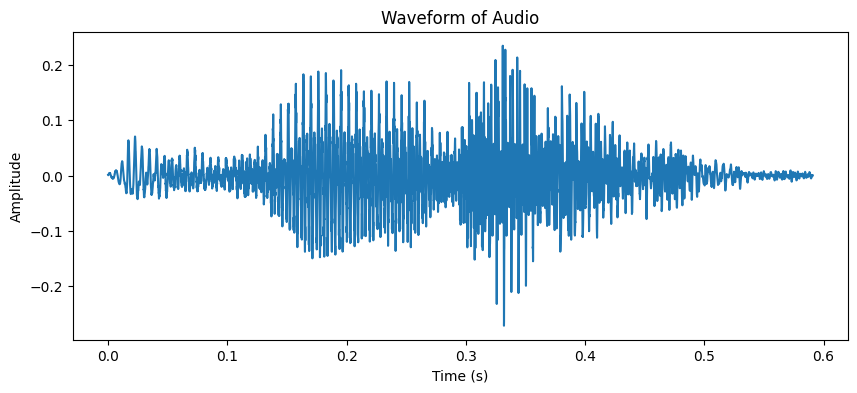

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(audio) / sr, num=len(audio)), audio)
plt.title('Waveform of Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Preprocess audio for the model


In [9]:
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
input_values = tokenizer(audio, return_tensors="pt", padding="longest").input_values


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.


# Load pretrained Wav2Vec 2.0 model


In [10]:
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Get embeddings


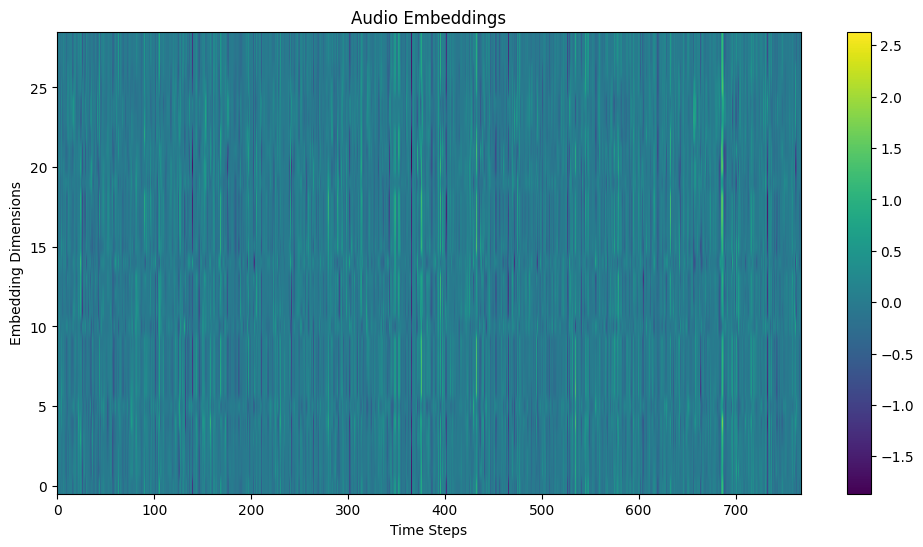

In [11]:
with torch.no_grad():
    embeddings = model(input_values).last_hidden_state

# The embeddings can now be used for further analysis or machine learning tasks
# Example: Visualize the embeddings
embeddings_np = embeddings.squeeze().numpy()
plt.figure(figsize=(12, 6))
plt.imshow(embeddings_np, aspect='auto', origin='lower')
plt.colorbar()
plt.title('Audio Embeddings')
plt.xlabel('Time Steps')
plt.ylabel('Embedding Dimensions')
plt.show()